# Investigating Fandango Movie Ratings

A data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. In particular the rating was almost rounded up to the nearest half-star or up even to the nearest whole star.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after [Hickey's analysis](https://fivethirtyeight.com/features/fandango-movies-ratings/) regarding the discrepancy between the number of stars displayed to users and the actual rating that was found in the HTML of the page.

We will be using the data available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17) to analyze the rating system's characteristics after Hickey's analysis.

In [20]:
import pandas as pd

movies_14_15 = pd.read_csv('fandango_score_comparison.csv')
movies_16_17 = pd.read_csv('movie_ratings_16_17.csv')

print(movies_14_15.info())
print(movies_16_17.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [21]:
# Isolating the data that offers information about Fandandgo's ratings
fan_14_15 = movies_14_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fan_16_17 = movies_16_17[['movie', 'year', 'fandango']].copy()

print(fan_14_15.head())
print(fan_16_17.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  
                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


## Defining the Goal

We want to compare the population at two different periods in time to compare the change in states.

First, let's look at whether the two samples are representative for the population we're trying to describe.

The sampling criteria of Hickey's article can be found in the [README.md](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) and is defined as:
* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
* The movie must have had tickets on sale in 2015.

This sampling is not random due to the exclusionary criteria such as having at least 30 fan ratings. While having a minimum number of ratings helps with outliers, the same method must be applied in the second sample. Also, there may be temporal bias due to the second criteria. Movies should have had tickets on sale extending a while back to ensure that there was no trend simply in 2015.

The sampling criteria of the other sample (for the post comparison) is found in the other [README.md](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) and is defined as:
* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

Temporal trends may have somewhat of an effect in this sample (but probably not as bad as in the other sample). Also, a lack of quantitative definition of "considerable number of votes and reviews" is not the best, but we can assume it is a comparable value to the other sample.

In both cases, this purposive sampling was good enough for the research of the indiviual authors, but we may have to change the goal of our analysis to make do.

## Changing the Goal

Since collecting new data would be quasi-impossible to do, we will be looking at whether popular movies in 2015 and popular movies in 2016 have significant differences between ratings. This should be a good proxy to our initial goal given the limitations in the data.

## Isolating the Samples We Need

We will isolate the movies released in 2015 from the first data set. 
We will also isolate the movies released in 2016 from the second data set and spot-check whether they have more than 30 ratings (the criteria from the first data set).

In [22]:
fan_2015 = fan_14_15[fandan['FILM'].str[-5:-1] == '2015']
fan_2016 = fan_16_17[mov['year'] == 2016]

fan_2016.sample(10, random_state = 1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


The sample of the second dataset seems to have most of the movies with the same rating criteria of the first dataset. We will assume that the rest are similar.

## Comparing Distribution Shapes for 2015 and 2016

We will now do a high-level comparison of the shapes of the distributions for both samples.

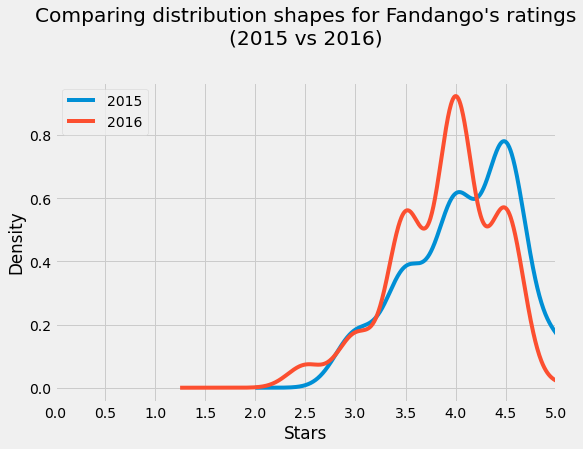

In [23]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use('fivethirtyeight')

fan_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fan_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.1) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

The 2015 distribution is left skewed and the 2016 distribution is more normal (but both are strongly left skewed and not looking very gaussian).

The skews suggest that movies on Fandango are mostly given high ratings. However, the left shift of the 2016 distribution seems promising for a potential change in the rating rounding.

## Comparing Relative Frequencies

We will now look at comparing normalized frequencies with percentages.

In [24]:
print(fan_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100)
print(fan_2016['fandango'].value_counts(normalize = True).sort_index() * 100)

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


In [25]:
print(fan_2015['Fandango_Stars'].describe())
print(fan_2016['fandango'].describe())

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64
count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64


As you can see above, the means are different with a different minimum and 75th percentile. You can also see the percentage breakdown showing different modes. The medians are the same however.

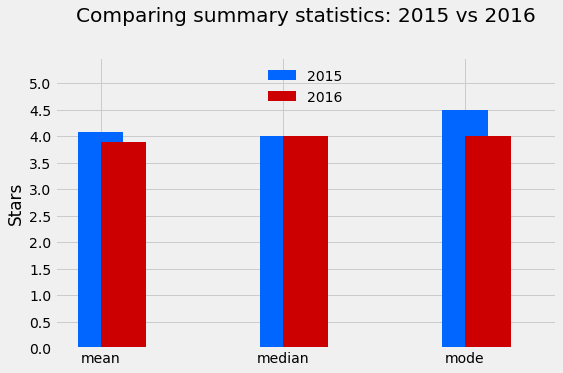

In [26]:
summary = pd.DataFrame() # Using the values found from above
summary['2015'] = [4.085271, 4.000000, 4.5]
summary['2016'] = [3.887435, 4.000000, 4.0]
summary.index = ['mean', 'median', 'mode']

plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.1)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

We can see above that the mean and mode is higher in 2015 than in 2016 for Fandango. Let's see if we can do a hypothesis test to determine if they are statistically different. First, we need to evaluate a few assumptions to determine whether to use a parametric or non-parametric test. For a parametric test, these are the following assumptions:
1. Assumption: Are the two samples independent? Yes
2. Assumption: Do the two samples have the same variances (Homogeneity of Variance)?
3. Assumption: Are the data from each of the 2 groups following a normal distribution? Let's find out.

### Homogeneity of Variance

To do this test, we will use the Levene test which tests the null hypothesis that all input samples are from populations with equal variances.

In [48]:
# Homogeneity of Variance Test
from scipy.stats import levene
levene(fan_2015['Fandango_Stars'],fan_2016['fandango'])
alpha = 0.05
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Groups have equal variances (fail to reject H0)')
else:
    print('Groups do not have equal variances (reject H0)')

Statistics=0.102, p=0.950
Groups have equal variances (fail to reject H0)


### Assumption of Normality

To do the test, we will use the Anderson-Darling test wcich tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against.

If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected.

In [49]:
# Anderson-Darling Test for 2015
from scipy.stats import anderson
result = anderson(fan_2015['Fandango_Stars'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 6.013
15.000: 0.559, data does not look normal (reject H0)
10.000: 0.637, data does not look normal (reject H0)
5.000: 0.764, data does not look normal (reject H0)
2.500: 0.892, data does not look normal (reject H0)
1.000: 1.061, data does not look normal (reject H0)


In [50]:
# Anderson-Darling Test for 2016
result = anderson(fan_2016['fandango'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 9.086
15.000: 0.565, data does not look normal (reject H0)
10.000: 0.643, data does not look normal (reject H0)
5.000: 0.771, data does not look normal (reject H0)
2.500: 0.900, data does not look normal (reject H0)
1.000: 1.070, data does not look normal (reject H0)


As the third assumption of normality is broken. We will use a non-parametric hypothesis test. For this scenario, the Mann-Whitney U test. The hypothesis are the following:
- Null hypothesis (H0): The two groups are sampled from populations with identical distributions. Typically, the sampled populations exhibit stochastic equality.
- Alternative hypothesis (Ha): The two groups are sampled from populations with different distributions. Most of the time, this means that one of the sampled populations (groups) displays stochastic dominance.

In [46]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(fan_2015['Fandango_Stars'], fan_2016['fandango'])
results

MannwhitneyuResult(statistic=14871.5, pvalue=0.001032445879587162)

We see above that the p value is less than 0.05 and thus we reject the null hypothesis and conclude that the two groups are sampled from populations with different distributions. This would provide evidence that 2015 and 2016 ratings were not the same and could be the result of manipulation as suggested in the beginning of this article.

## Comparing to Other Movie Rating Aggregators

We can use the two samples to compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating. For this project, we will only use the second sample to compare Fandango to IMDB.

### IMDB vs Fandango

Let's begin by preparing our IMDB data. We will be using the nr_imdb which is the imdb score normalized to a 0-5 scale rounded to the nearest 0.5.

In [80]:
imdb_16_17 = movies_16_17[['movie', 'year', 'nr_imdb']].copy()
imdb_16 = imdb_16_17[imdb_16_17['year'] == 2016]

imdb_16.sample(10, random_state = 1)

,movie,year,nr_imdb
36,Collide,2016,3.0
75,Ice Age: Collision Course,2016,3.0
125,Now You See Me 2,2016,3.0
171,The Disappointments Room,2016,2.0
92,Kubo and the Two Strings,2016,4.0
134,Pride and Prejudice and Zombies,2016,3.0
40,Deadpool,2016,4.0
115,Money Monster,2016,3.0
204,War Dogs,2016,3.5
111,Miracles from Heaven,2016,3.5


Let's see the distribution compared to Fandango.

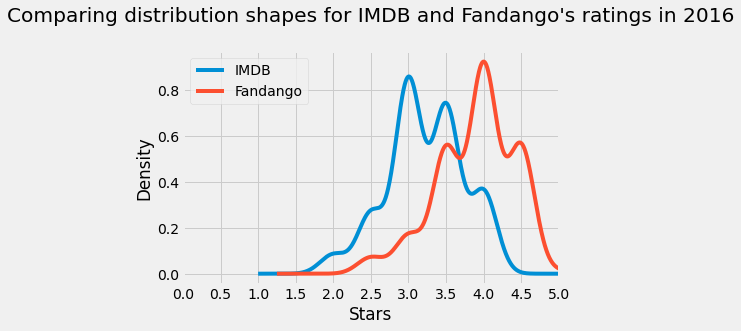

In [81]:
imdb_16['nr_imdb'].plot.kde(label = 'IMDB', legend = True)
fan_2016['fandango'].plot.kde(label = 'Fandango', legend = True)

plt.title("Comparing distribution shapes for IMDB and Fandango's ratings in 2016",
          y = 1.1) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

We see that IMDB is a little skewed and slightly lower than Fandango. Let's look at a comparison statistics graph.

In [84]:
print(imdb_16['nr_imdb'].value_counts(normalize = True).sort_index() * 100)
print(fan_2016['fandango'].value_counts(normalize = True).sort_index() * 100)

2.0     3.664921
2.5    11.518325
3.0    37.172775
3.5    31.937173
4.0    15.706806
Name: nr_imdb, dtype: float64
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


In [85]:
print(imdb_16['nr_imdb'].describe())
print(fan_2016['fandango'].describe())

count    191.000000
mean       3.222513
std        0.504157
min        2.000000
25%        3.000000
50%        3.000000
75%        3.500000
max        4.000000
Name: nr_imdb, dtype: float64
count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64


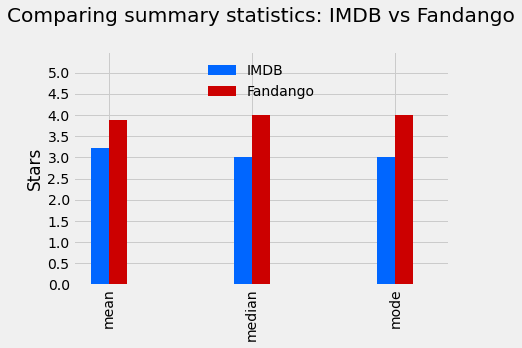

In [95]:
summary_sites = pd.DataFrame() # Using the values found from above
summary_sites['IMDB'] = [3.222513, 3.0, 3.0]
summary_sites['Fandango'] = [3.887435, 4.0, 4.0]
summary_sites.index = ['mean', 'median', 'mode']

plt.style.use('fivethirtyeight')
summary_sites['IMDB'].plot.bar(color = '#0066FF', align = 'center', label = 'IMDB', width = .25)
summary_sites['Fandango'].plot.bar(color = '#CC0000', align = 'edge', label = 'Fandango', width = .125)

plt.title('Comparing summary statistics: IMDB vs Fandango', y = 1.1)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Above, we can see that IMDB is closer to the middle value. Looking at this and the distribution shapes, we can infer that IMDB is more likely to show a more representative scale of movies rather than a skewed one such as Fandango.

## Conclusion

For Fandango, we saw that 2015 had a more skewed distribution than 2016. When we compared the summary statistics and performed a non-parametric hypothesis test (the Mann-Whitney U test), we were able to determine that the two year samples were from populations with different distributions with a p value of < 0.001.

We were also able to compare Fandango to IMDB and found that IMDB had a less skewed distribution closer to the middle score of 2.5. This would suggest that IMDB when normalized was able to provide a bigger spread of movie values that allow it to be more informational to the user.

For future work, we can look at time series data created through scraping a page. For example, we can scrape IMDB for dates from 2000 to 2022 using the below web scraping program. Since web scraping is a project of its own, we will shelve that for another day.

```python
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from random import randint
from time import timestart_time = time()
from IPython.core.display import clear_output
from warnings import warnwarn("Warning Simulation")

# Declaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Creating the intervals to search
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2022)]

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2021
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('https://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))
                
# Create the dataframe to then clean and analyze
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
```